In [1]:
# Install required libraries (run this once if needed)
%pip install numpy pandas matplotlib
# sagemaker


Note: you may need to restart the kernel to use updated packages.


# Required tasks
1. Dataset visualization: plot M vs L. Comment on linearity and plausibility.

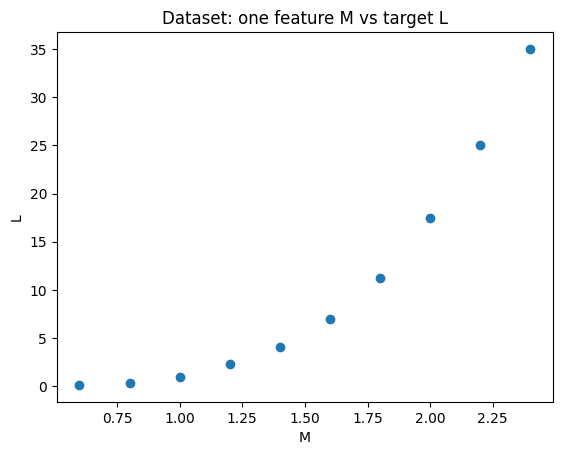

In [2]:
import numpy as np
import matplotlib.pyplot as plt
M = np.array([0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4])
L = np.array([0.15, 0.35, 1.00, 2.30, 4.10, 7.00, 11.2, 17.5, 25.0, 35.0])

plt.figure()
plt.scatter(M, L)
plt.xlabel("M")
plt.ylabel("L")
plt.title("Dataset: one feature M vs target L")
plt.show()

- The relationship between M and L is not linear because the points follow a curved increasing trend. This pattern is plausible, as it can represent real processes where growth accelerates with the increase of M.

2. Model and loss: implement prediction and mean squared error (MSE).


In [3]:
def predict(x, w, b):
    """Compute the predicted y values for given x, using f_{w,b}(x) = w x + b."""
    return w * x + b

w_test = 0.0
b_test = 0.0
y_hat_test = predict(M, w_test, b_test)
print("First 5 predictions with w=0, b=0:", y_hat_test[:5])

def compute_cost(x, y, w, b):
    m = x.shape[0]
    y_hat = w * x + b  # f_{w,b}(x)
    errors = y_hat - y
    cost = (1 / (2 * m)) * np.sum(errors ** 2)
    return cost

print("Cost with w=0, b=0:", compute_cost(M, L, w_test, b_test))


First 5 predictions with w=0, b=0: [0. 0. 0. 0. 0.]
Cost with w=0, b=0: 117.69675000000001


3. Cost surface (mandatory): evaluate J(w,b) on a grid of w and b. Plot a 3D surface or contour plot. Explain what the minimum represents.

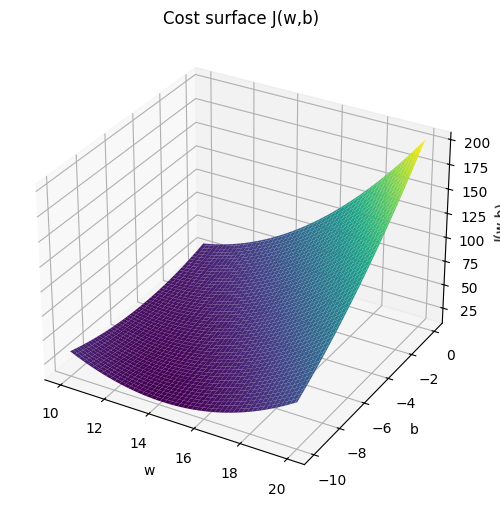

In [4]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

w_values = np.linspace(10, 20, 100)
b_values = np.linspace(-10, 0, 100)

W, B = np.meshgrid(w_values, b_values)
J_vals = np.zeros_like(W)
for i in range(W.shape[0]):
    for j in range(W.shape[1]):
        J_vals[i, j] = compute_cost(M, L, W[i, j], B[i, j])

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W, B, J_vals, cmap=cm.viridis, linewidth=0, antialiased=True)
ax.set_xlabel("w")
ax.set_ylabel("b")
ax.set_zlabel("J(w,b)")
ax.set_title("Cost surface J(w,b)")
plt.show()

The minimum represents the point where the cost function J(w,b) is smallest. At this point, the values of w and b produce the line that fits the data with the least error. Therefore, finding this minimum allows us to obtain the best possible model.

4. Gradients: derive and implement dJ/dw and dJ/db.

In [5]:
# Gradient descent implementation vectorized with numpy.
def compute_gradients_vectorized(x, y, w, b):
    m = x.shape[0]
    y_hat = w * x + b  # f_{w,b}(x)
    errors = y_hat - y


    dj_dw = (1 / m) * np.sum(errors * x)
    dj_db = (1 / m) * np.sum(errors)
    return dj_dw, dj_db

dj_dw_test, dj_db_test = compute_gradients_vectorized(M, L, w_test, b_test)
print("Gradients at w=0, b=0:", dj_dw_test, dj_db_test)

# Gradient descent implementation not vectorized, we do each operation index by index.
def compute_gradients_non_vectorized(x, y, w, b):
    m = x.shape[0]
    errors = np.zeros(m)
    for i in range(m):
        y_hat_i = w * x[i] + b  # f_{w,b}(x_i)
        error_i = y_hat_i - y[i]
        errors[i] = error_i

    dj_dw = (1 / m) * np.sum(errors * x)
    dj_db = (1 / m) * np.sum(errors)
    return dj_dw, dj_db

dj_dw_test, dj_db_test = compute_gradients_vectorized(M, L, w_test, b_test)
print("Gradients at w=0, b=0:", dj_dw_test, dj_db_test)

Gradients at w=0, b=0: -21.523 -10.36
Gradients at w=0, b=0: -21.523 -10.36


5. Gradient descent (non-vectorized): compute gradients using an explicit loop over samples.
6. Gradient descent (vectorized): compute gradients using NumPy vectorization (no loop over samples).

In [10]:
import time
# Gradient descent using vectorized gradients
def gradient_descent_vectorized(x, y, w_init, b_init, alpha, num_iterations):
    w = w_init
    b = b_init
    history = []

    for i in range(num_iterations):
        dj_dw, dj_db = compute_gradients_vectorized(x, y, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        cost = compute_cost(x, y, w, b)
        history.append((i, cost))

        if i % max(1, (num_iterations // 10)) == 0:
            print(f"Iteration {i:4d}: w={w:7.4f}, b={b:7.4f}, cost={cost:8.4f}")

    return w, b, history

#Gradient descent using non-vectorized gradients
def gradient_descent_non_vectorized(x, y, w_init, b_init, alpha, num_iterations):
    w = w_init
    b = b_init
    history = []

    for i in range(num_iterations):
        dj_dw, dj_db = compute_gradients_non_vectorized(x, y, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        cost = compute_cost(x, y, w, b)
        history.append((i, cost))

        if i % max(1, (num_iterations // 10)) == 0:
            print(f"Iteration {i:4d}: w={w:7.4f}, b={b:7.4f}, cost={cost:8.4f}")

    return w, b, history

alpha = 0.01
num_iterations = 100000

w_init = 0.0
b_init = 0.0
#Test vectorized version
start = time.time()
w_learned, b_learned, history = gradient_descent_vectorized(M, L, w_init, b_init, alpha, num_iterations)
print("\nLearned parameters:")
print("w =", w_learned)
print("b =", b_learned)
end = time.time()
print(f"Vectorized version time: {end - start} seconds")

#Test non-vectorized version
start = time.time()
w_learned, b_learned, history = gradient_descent_non_vectorized(M, L, w_init, b_init, alpha, num_iterations)
print("\nLearned parameters:")
print("w =", w_learned)
print("b =", b_learned)
end = time.time()
print(f"Non-vectorized version time: {end - start} seconds")

Iteration    0: w= 0.2152, b= 0.1036, cost=112.0896
Iteration 10000: w=18.1294, b=-16.8339, cost=  9.7951
Iteration 20000: w=18.1303, b=-16.8355, cost=  9.7951
Iteration 30000: w=18.1303, b=-16.8355, cost=  9.7951
Iteration 40000: w=18.1303, b=-16.8355, cost=  9.7951
Iteration 50000: w=18.1303, b=-16.8355, cost=  9.7951
Iteration 60000: w=18.1303, b=-16.8355, cost=  9.7951
Iteration 70000: w=18.1303, b=-16.8355, cost=  9.7951
Iteration 80000: w=18.1303, b=-16.8355, cost=  9.7951
Iteration 90000: w=18.1303, b=-16.8355, cost=  9.7951

Learned parameters:
w = 18.130303030301693
b = -16.835454545452365
Vectorized version time: 1.2934575080871582 seconds
Iteration    0: w= 0.2152, b= 0.1036, cost=112.0896
Iteration 10000: w=18.1294, b=-16.8339, cost=  9.7951
Iteration 20000: w=18.1303, b=-16.8355, cost=  9.7951
Iteration 30000: w=18.1303, b=-16.8355, cost=  9.7951
Iteration 40000: w=18.1303, b=-16.8355, cost=  9.7951
Iteration 50000: w=18.1303, b=-16.8355, cost=  9.7951
Iteration 60000: w=1

We use the time module to calculate the execution time of the operation, which provides evidence that the vectorized implementation is faster than the non-vectorized version.

7. Convergence (mandatory): plot loss vs iterations, and comment on convergence speed and stability.

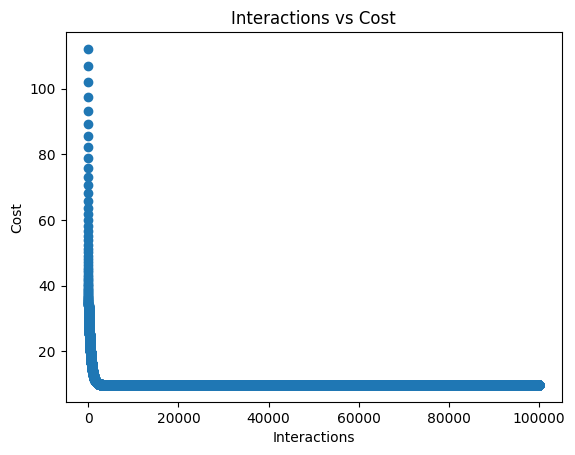

In [7]:

plt.figure()
interactions, costs = zip(*history)
plt.scatter(interactions, costs)
plt.xlabel("Interactions")
plt.ylabel("Cost")
plt.title("Interactions vs Cost")
plt.show()

Initially, the graph changes rapidly because the error is large. As the error decreases with each iteration, the updates become smaller, causing the graph to converge toward a stable behavior.

8. Experiments (mandatory): run at least three learning rates; report final w, b, and loss.

In [8]:
#First, we use a lower learning rate.
alpha = 0.0001
num_iterations = 1000

w_init = 0.0
b_init = 0.0
w_learned, b_learned, history = gradient_descent_vectorized(M, L, w_init, b_init, alpha, num_iterations)
print("\nLearned parameters:")
print("w =", w_learned)
print("b =", b_learned)

#Second, we use a bigger learning rate.
alpha = 0.1
w_init = 0.0
b_init = 0.0
w_learned, b_learned, history = gradient_descent_vectorized(M, L, w_init, b_init, alpha, num_iterations)
print("\nLearned parameters:")
print("w =", w_learned)
print("b =", b_learned)

# Finally, we use a very big learning rate.
alpha = 0.59
w_init = 0.0
b_init = 0.0
w_learned, b_learned, history = gradient_descent_vectorized(M, L, w_init, b_init, alpha, num_iterations)
print("\nLearned parameters:")
print("w =", w_learned)
print("b =", b_learned)

Iteration    0: w= 0.0022, b= 0.0010, cost=117.6397
Iteration  100: w= 0.2138, b= 0.1025, cost=112.1295
Iteration  200: w= 0.4187, b= 0.1999, cost=106.9871
Iteration  300: w= 0.6168, b= 0.2932, cost=102.1877
Iteration  400: w= 0.8086, b= 0.3828, cost= 97.7082
Iteration  500: w= 0.9942, b= 0.4686, cost= 93.5271
Iteration  600: w= 1.1739, b= 0.5509, cost= 89.6243
Iteration  700: w= 1.3477, b= 0.6296, cost= 85.9810
Iteration  800: w= 1.5160, b= 0.7051, cost= 82.5797
Iteration  900: w= 1.6789, b= 0.7773, cost= 79.4043

Learned parameters:
w = 1.8350701761498411
b = 0.8457775854819244
Iteration    0: w= 2.1523, b= 1.0360, cost= 70.4969
Iteration  100: w=13.4290, b=-9.0460, cost= 13.7140
Iteration  200: w=16.3146, b=-13.8270, cost= 10.3797
Iteration  300: w=17.4290, b=-15.6735, cost=  9.8823
Iteration  400: w=17.8595, b=-16.3867, cost=  9.8082
Iteration  500: w=18.0257, b=-16.6621, cost=  9.7971
Iteration  600: w=18.0899, b=-16.7685, cost=  9.7954
Iteration  700: w=18.1147, b=-16.8096, cost=

In the first case, we use a very low learning rate. The algorithm works correctly, but it is very slow. In the second case, we increase the learning rate slightly, and the result is much faster. However, in the last case, the learning rate is too high, and the algorithm never converges because the cost starts to increase.

9. Final fit plot: plot the regression line over the data and discuss systematic errors.

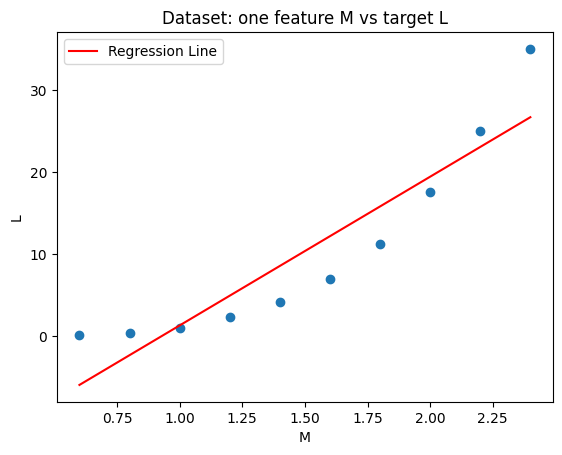

In [11]:
plt.figure()
plt.scatter(M, L)
plt.xlabel("M")
plt.ylabel("L")
plt.title("Dataset: one feature M vs target L")
# Plot the regression line
x_vals = np.array([min(M), max(M)])
y_vals = predict(x_vals, w_learned, b_learned)

plt.plot(x_vals, y_vals, color='red', label='Regression Line')
plt.legend()
plt.show()

The line approximately represents the behavior of the data, but even so, it still has a large error that cannot be reduced further.

10. Conceptual questions:
- astrophysical meaning of w;

    w represents the proportional relationship between stellar mass (M) and stellar luminosity (L). It indicates how much the luminosity changes for a given change in mass.

- Why is a linear model limited here?

    The linear model is limited because the relationship between mass and luminosity is not linear and follows a curved, increasing trend. It is evidence even in the first view.